# Artificial Neural Network

### Importing the libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import warnings

warnings.filterwarnings("ignore")
tf.__version__

'2.4.1'

## Part 1 - Data Preprocessing

### Importing the dataset

In [2]:
df = pd.read_excel('Data.xlsx')
X = df.iloc[:,:-1].values
y = df.iloc[:,-1].values
df.head()

,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90


### Splitting the dataset into the Training set and Test set

In [3]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

### Feature Scaling

In [4]:
# Better R2 with scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Part 2 - Building the ANN

### Initializing the ANN

In [5]:
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense

In [6]:
ann = Sequential()

### Adding the input layer and the first hidden layer

In [7]:
ann.add(Dense(units = 6, activation = "relu"))

### Adding the second hidden layer

In [8]:
ann.add(Dense(units = 6, activation = "relu"))

### Adding the output layer

Recommended activation functions:
- Binary classification : sigmoid
- Mutiple class classification : softmax
- Regression : None or relu

In [9]:
# Alt 1
ann.add(Dense(units = 1))

# Alt 2
# ann.add(Dense(units = 1, activation = "relu"))

## Part 3 - Training the ANN

### Compiling the ANN

In [10]:
ann.compile(optimizer="adam", loss = "mse")

### Training the ANN on the Training set

In [11]:
history = ann.fit(X_train, y_train, batch_size= 32 , epochs = 100 )

Epoch 1/100
240/240 [==============================] - 1s 1ms/step - loss: 206532.0070
Epoch 2/100
240/240 [==============================] - 0s 1ms/step - loss: 200779.3329
Epoch 3/100
240/240 [==============================] - 0s 1ms/step - loss: 178598.8663
Epoch 4/100
240/240 [==============================] - 0s 1ms/step - loss: 132765.4446
Epoch 5/100
240/240 [==============================] - 0s 1ms/step - loss: 73361.6386
Epoch 6/100
240/240 [==============================] - 0s 1ms/step - loss: 34127.6300
Epoch 7/100
240/240 [==============================] - 0s 1ms/step - loss: 22270.7203
Epoch 8/100
240/240 [==============================] - 0s 1ms/step - loss: 17029.8477
Epoch 9/100
240/240 [==============================] - 0s 1ms/step - loss: 13235.5890
Epoch 10/100
240/240 [==============================] - 0s 1ms/step - loss: 9794.2896
Epoch 11/100
240/240 [==============================] - 0s 1ms/step - loss: 6809.5604
Epoch 12/100
240/240 [============================

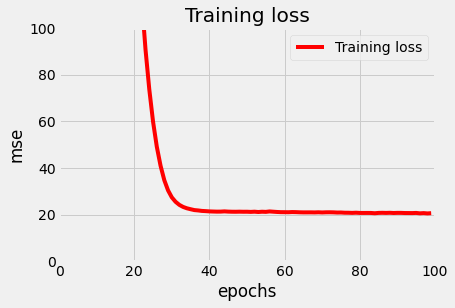

In [12]:
loss = history.history["loss"]
epochs = range(len(loss))

plt.style.use('fivethirtyeight')
plt.plot(epochs, loss, 'r', label='Training loss')
plt.title('Training loss')
plt.legend(loc=0)
plt.xlabel("epochs")
plt.ylabel("mse")
plt.xlim(0, 100)
plt.ylim(0,100)

plt.show()

## Part 4 - Making the predictions and evaluating the model

### Predicting the Test set results

In [13]:
y_pred = ann.predict(X_test)

In [14]:
print(np.concatenate((y_pred.reshape(-1,1), y_test.reshape(-1,1)),1))

[[430.84729004 431.23      ]
 [457.9225769  460.01      ]
 [462.47045898 461.14      ]
 ...
 [469.14227295 473.26      ]
 [442.03103638 438.        ]
 [461.99319458 463.28      ]]


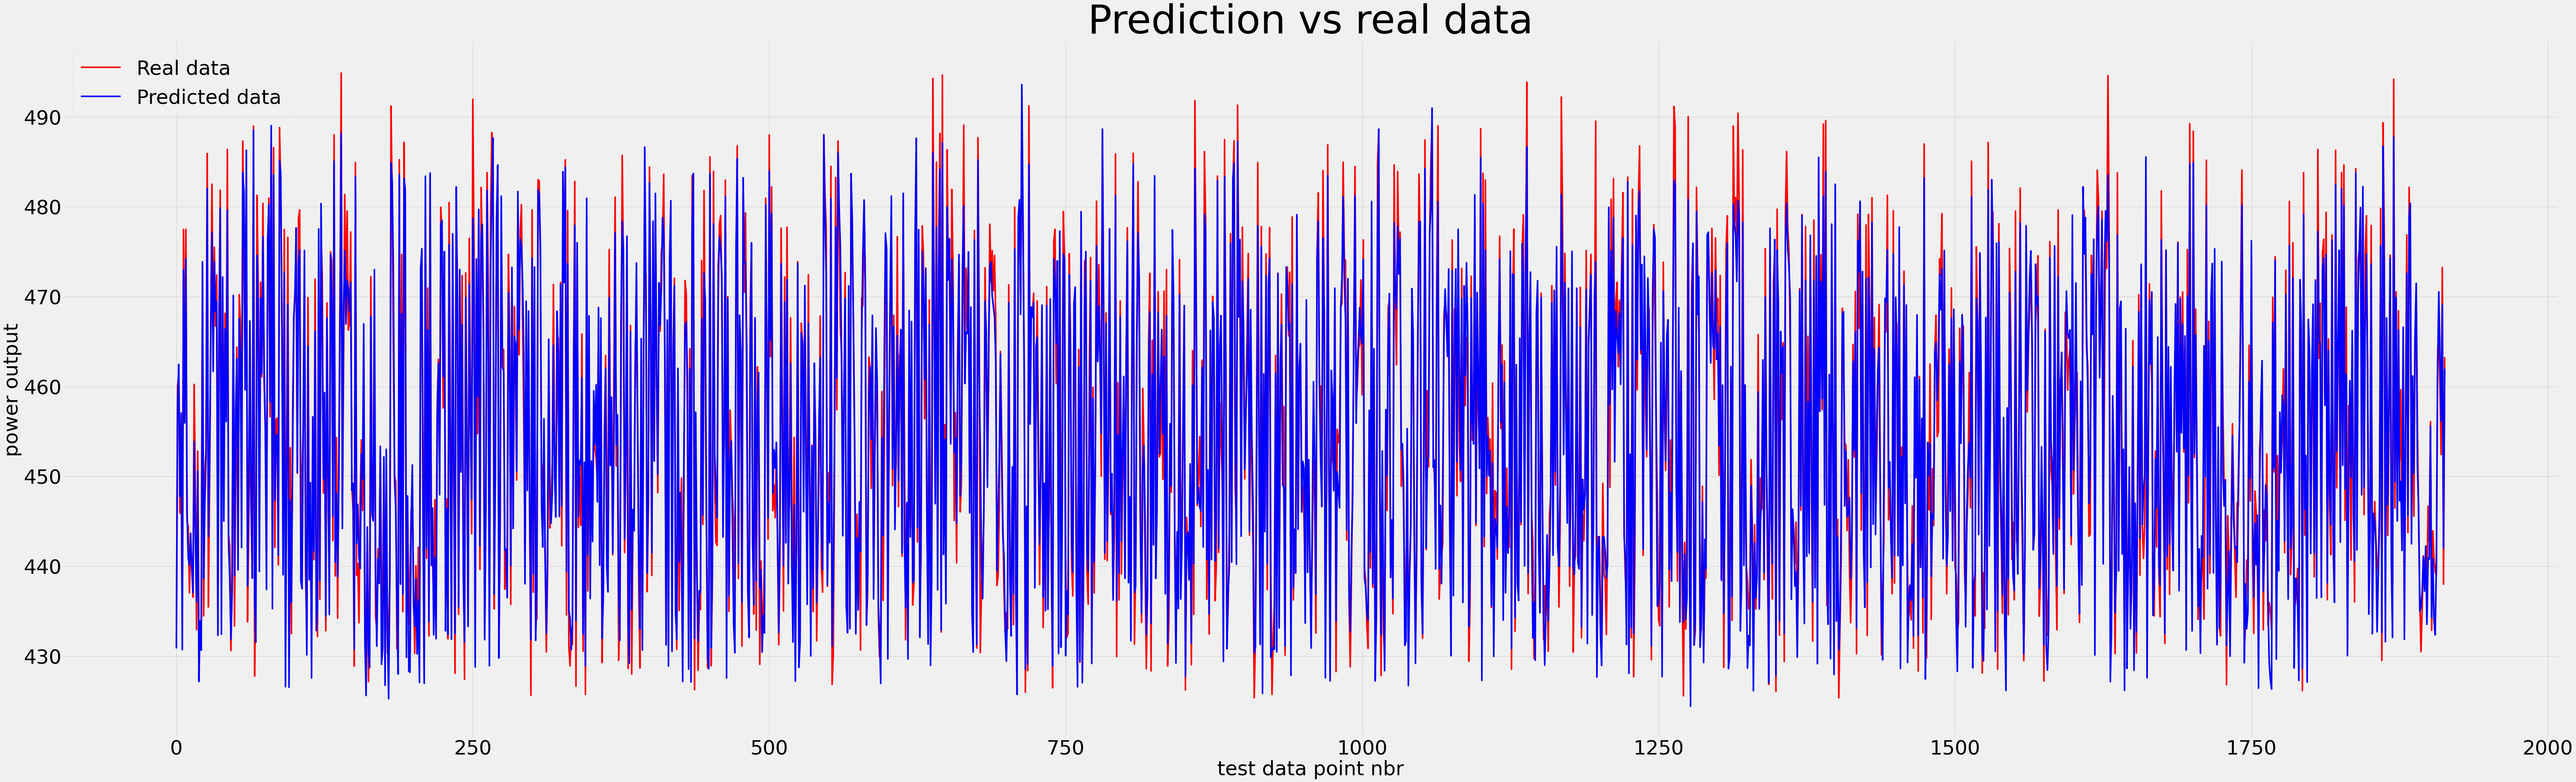

In [15]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(100,30))
plt.plot(y_test, color = 'red', label = 'Real data')
plt.plot(y_pred, color = 'blue', label = 'Predicted data')
plt.xlabel("test data point nbr", size=50)
plt.ylabel("power output", size=50)
plt.title('Prediction vs real data', size = 100)
plt.xticks(size=50)
plt.yticks(size=50)
plt.legend(loc = "best", prop={'size': 50})
plt.show()

### R2 and mean-squared-error

- none / relu gives the same values for R2 och mse
- with scaling R2 0.02 higher and mse 5 lower


In [16]:
from sklearn.metrics import r2_score, mean_squared_error

print("r2_score:", r2_score(y_test, y_pred))
print("mse:", mean_squared_error(y_test, y_pred))

r2_score: 0.9349219605650206
mse: 19.03453489307427
